# <span style="color:purple">  Gaussian Kernel Density Based Anomaly Detection with scikit-learn  </span>

### Step by step...
1. Load and process data
2. Find a distribution to fit them
3. Assign a density/probability for each point in said distribution
4. Set a cutoff
5. Declare outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.neighbors.kde import KernelDensity
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use(['seaborn-darkgrid'])

## Unsupervised

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2, centers=1, n_samples=500, random_state=666)

In [3]:
X.shape

(500, 2)

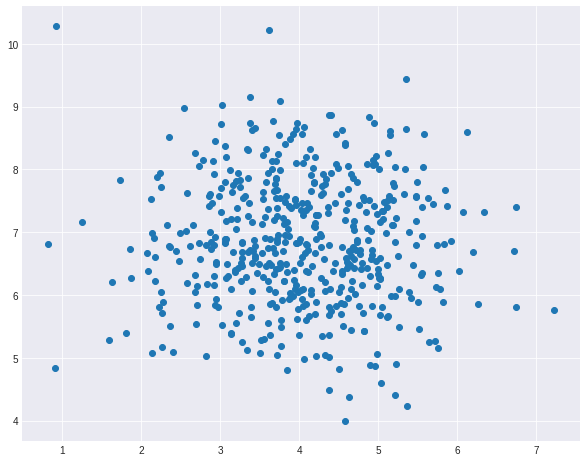

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1]);

![title](images/kde.png)

In [5]:
kde = KernelDensity(kernel='gaussian') 
kde.fit(X)
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

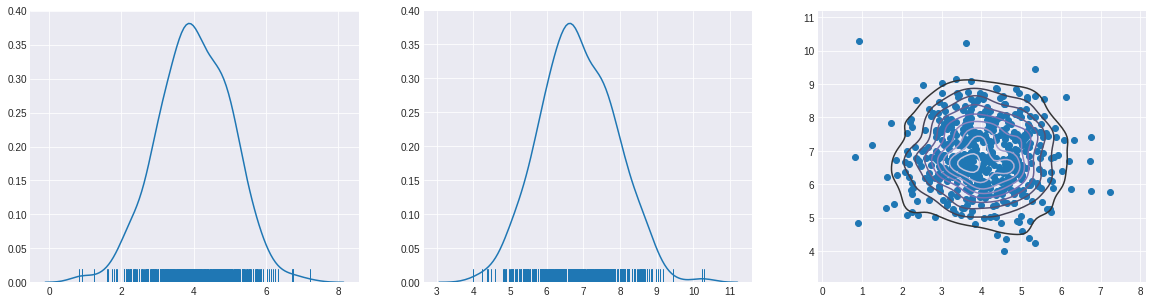

In [6]:
#gráficamente
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(X[:, 0], hist=False, rug=True)
plt.subplot(1,3,2)
sns.distplot(X[:, 1], hist=False, rug=True)
plt.subplot(1,3,3)
sns.kdeplot(X, cmap='Purples_d')
plt.scatter(X[:, 0], X[:, 1]);

In [7]:
kde_X = kde.score_samples(X) # evaluate the density of the points.

In [8]:
X[0], kde_X[0] # punto i, densidad del punto i

(array([ 4.28335064,  5.3536035 ]), -3.0951045816021292)

In [9]:
#set cutoff

In [10]:
from scipy.stats.mstats import mquantiles
a = np.array(range(1,101))
mquantiles(a) #cuartiles, 25% de los datos

array([ 25.45,  50.5 ,  75.55])

In [11]:
alpha_set = 0.95 # 3-σ, box plot rule
tau_kde = mquantiles(kde_X, 1. - alpha_set) # Computes empirical quantiles for a data array 

## Cómo decidir el punto de corte?
![title](images/Screenshot from 2017-09-02 20-23-59.png)

In [12]:
# filter
X_points = X[kde_X>tau_kde]
X_outliers = X[kde_X<tau_kde]

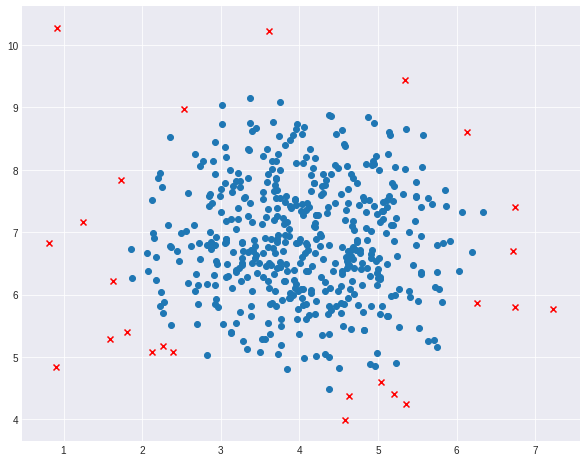

In [13]:
plt.figure(figsize=(10,8))
#sns.kdeplot(a, b)
plt.scatter(X_points[:,0], X_points[:,1])
plt.scatter(X_outliers[:,0], X_outliers[:,1], c='r', marker='x');

# Supervised

In [16]:
data = loadmat('data/ex8data1.mat')  
X2 = data['X']  
X2.shape  

(307, 2)

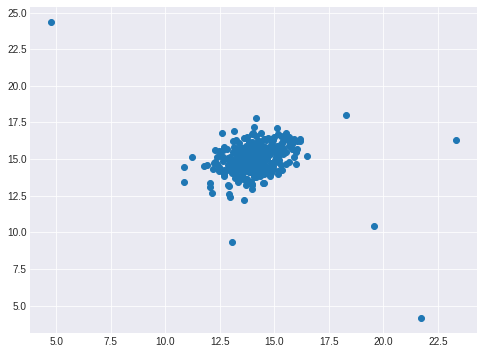

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1]);

In [18]:
# load labeled data
Xval = data['Xval']  
yval = data['yval']
Xval.shape, yval.shape # data points, labels 1 anomalous, 0 normal

((307, 2), (307, 1))

In [19]:
# reshape labels
yval_flat = yval.reshape((Xval.shape[0],))

In [20]:
X_lo = Xval[yval_flat == 1] # labeled outliers
Xvalt = Xval[yval_flat != 1] # data without the labeled outliers

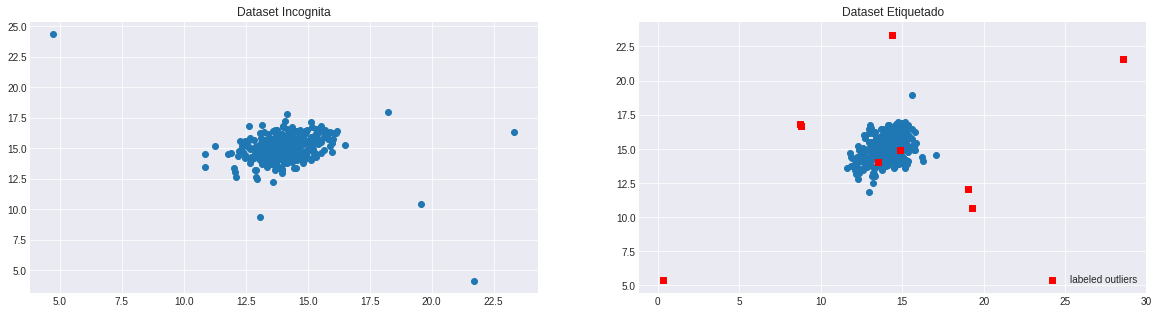

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Dataset Incognita')
plt.scatter(X2[:, 0], X2[:, 1])
plt.subplot(122)
plt.scatter(Xvalt[:, 0], Xvalt[:, 1])
plt.scatter(X_lo[:, 0], X_lo[:, 1], marker='s', color='r', label='labeled outliers')
plt.legend(loc='lower right')
plt.title('Dataset Etiquetado');

In [31]:
# fit to the data X
kde = KernelDensity(kernel='gaussian')
kde_X = kde.fit(X2)
kde_lo = kde.fit(Xvalt)

In [23]:
# evaluate the density of the points.
X_score = kde_X.score_samples(X2) # for the data
lo_score = kde_lo.score_samples(Xvalt) #for the data without the labeled outliers

In [24]:
# stablish minimum score
tau_kde_lo = lo_score.min() #threshold

In [25]:
# filter
X2_points = X2[X_score>tau_kde_lo]
X2_outliers = X2[X_score<tau_kde_lo]

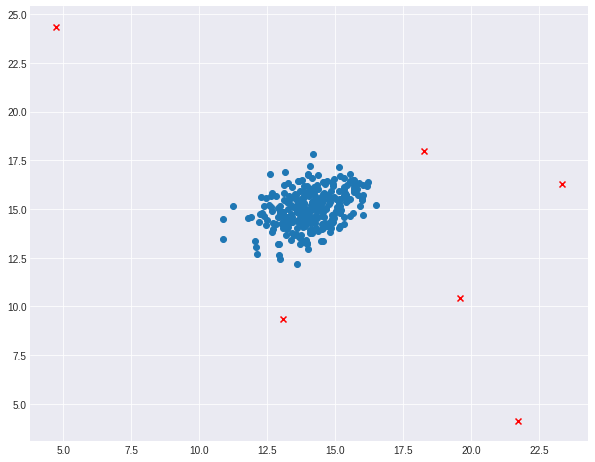

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(X2_points[:,0], X2_points[:,1])
plt.scatter(X2_outliers[:,0], X2_outliers[:,1], c='r', marker='x');

In [27]:
###Discussion###

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # [1, a, b, a^2, ab, b^2]
a = poly.fit_transform(Xvalt)

In [29]:
b = poly.fit_transform(X_lo)

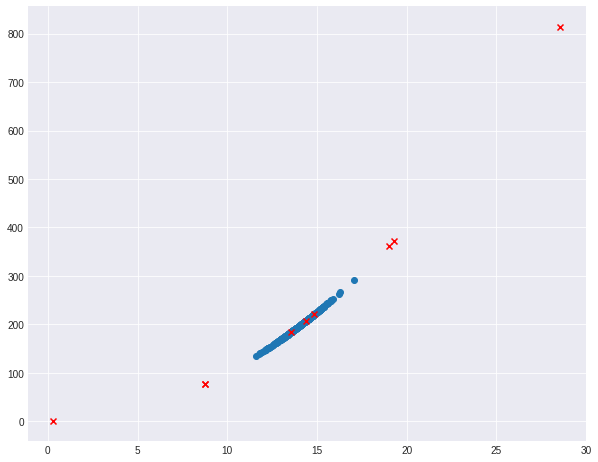

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(a[:,1], a[:,3])
plt.scatter(b[:,1], b[:,3], marker='x', c='r');

###### References:

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-8/

https://github.com/amueller/scipy-2017-sklearn

Bishop, C. M. (2013). Pattern Recognition and Machine Learning (section: 2.5.1).

Sarah Guido, Andreas Müller (2016). Introduction to Machine Learning with Python